# Project Investigate a Movie Dataset


> This dataset is collected from The Movie Database (TMDB) and contains information about 10,000 movies. Some of the key information contained in this dataset about the movies are - revenue, budget, popularity, director and production houses.
We will be investigating this dataset to see what are the attributes associated with the most profitable movies

>**Some of the Questions that we will be asking from the dataset to aid our analysis**
>> - Which are the most profitable movies
>> - Is their a relationship between their budget and revenue
>> - Who are the top revenue generating directors
>> - What production companies are associated with these movies and their directors

## Data Wrangling

In [17]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline

In [4]:
mdf = pd.read_csv("01 Datasets\\tmdb-movies.csv")

In [6]:
mdf.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
mdf.shape

(10866, 21)

## Data Cleaning

In [8]:
# Dropping unrequired columns from the dataframe 
mdf.drop(['id','imdb_id','tagline','keywords','overview','homepage'], axis=1, inplace=True)
mdf.shape

(10866, 15)

In [9]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


In [10]:
mdf.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
#correlation matrix
mcorr = mdf.corr()
mcorr

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


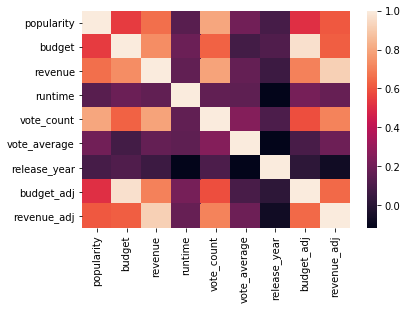

In [14]:
# Correlation Matrix to observe the correlation between the variables
import seaborn as sns
sns.heatmap(mcorr);

>**Observation**: From the above correalation grid popularity is correlated to vote count, revenue and budget. Therefore these metrics will be used to draw insights for most popular movies and directors and the profit they have made.

# Insights from Data

### 1) Top 10 revenue generating director

In [20]:
directors_revenue = mdf.groupby('director',as_index=False).agg({'revenue_adj':'sum','budget_adj':'sum'})
top_10_directors_revenue = directors_revenue.nlargest(10,'revenue_adj').sort_values(by='revenue_adj',ascending=False)
top_10_directors_revenue

,director,revenue_adj,budget_adj
4601,Steven Spielberg,1.520245e+10,2.151770e+09
1997,James Cameron,7.327221e+09,1.030992e+09
3800,Peter Jackson,7.019848e+09,1.375725e+09
1679,George Lucas,6.313919e+09,4.697600e+08
4140,Robert Zemeckis,5.655648e+09,1.328678e+09
3284,Michael Bay,5.460672e+09,1.501996e+09
763,Chris Columbus,5.094077e+09,7.407345e+08
4716,Tim Burton,4.529285e+09,1.328826e+09
4189,Ron Howard,4.527095e+09,1.475948e+09
4033,Ridley Scott,4.219566e+09,1.740157e+09


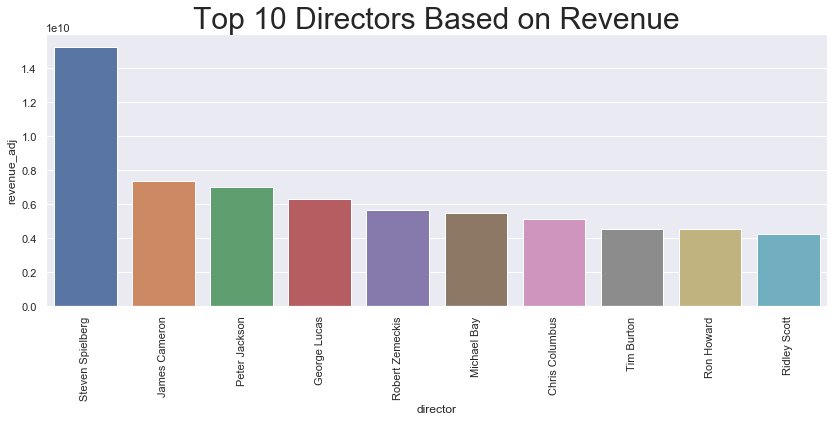

In [22]:
#bar plot using seaborn
sns.set(style="darkgrid")
a4_dims=(14,5)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.barplot(x="director",y="revenue_adj",data=top_10_directors_revenue);
g.set_xticklabels(ax.get_xticklabels(),rotation=90);
g.set_title('Top 10 Directors Based on Revenue',fontsize=30);

### 2) Directors with Highest Profits

In [23]:
directors_profit = mdf.groupby('director',as_index=False).agg({'revenue_adj':'sum','budget_adj':'sum'})
directors_profit['profit'] = directors_profit['revenue_adj']-directors_profit['budget_adj']
top_10_directors_profit = directors_profit.nlargest(10,'profit').sort_values(by='profit',ascending=False)
top_10_directors_profit

,director,revenue_adj,budget_adj,profit
4601,Steven Spielberg,1.520245e+10,2.151770e+09,1.305068e+10
1997,James Cameron,7.327221e+09,1.030992e+09,6.296229e+09
1679,George Lucas,6.313919e+09,4.697600e+08,5.844159e+09
3800,Peter Jackson,7.019848e+09,1.375725e+09,5.644123e+09
763,Chris Columbus,5.094077e+09,7.407345e+08,4.353343e+09
4140,Robert Zemeckis,5.655648e+09,1.328678e+09,4.326970e+09
3284,Michael Bay,5.460672e+09,1.501996e+09,3.958676e+09
1203,David Yates,4.177455e+09,7.830252e+08,3.394430e+09
4716,Tim Burton,4.529285e+09,1.328826e+09,3.200460e+09
845,Christopher Nolan,4.164262e+09,1.014694e+09,3.149568e+09


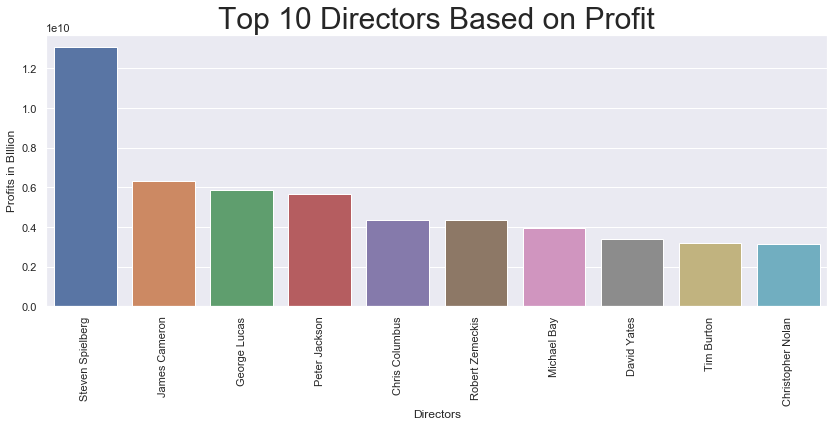

In [24]:
#bar plot using seaborn

sns.set(style="darkgrid")
a4_dims=(14,5)
fig, ax = pyplot.subplots(figsize=a4_dims)
gr = sns.barplot(x="director",y="profit",data=top_10_directors_profit)
gr.set_xticklabels(ax.get_xticklabels(),rotation=90);
gr.set_title("Top 10 Directors Based on Profit",fontsize=30);
ax.set(ylabel='Profits in BIllion', xlabel='Directors');

>**Observation:** Clearly from the above observation the most profitable director is Steven Spielberg

In [42]:
#filter_list = ['Steven Spielberg', 'James Cameron', 'George Lucas','Peter Jackson','Chris Columbus','Robert Zemeckis','Michael Bay','David Yates','Tim Burton','Christopher Nolan']
filter_list_directors = ['Steven Spielberg', 'James Cameron', 'George Lucas','Peter Jackson','Chris Columbus',
               'Michael Bay','Christopher Nolan']
top_7_dir=mdf[mdf.director.isin(filter_list_directors)]
top_5_movies = ['Star Wars','Avatar','Titanic','The Exorcist','Jaws']

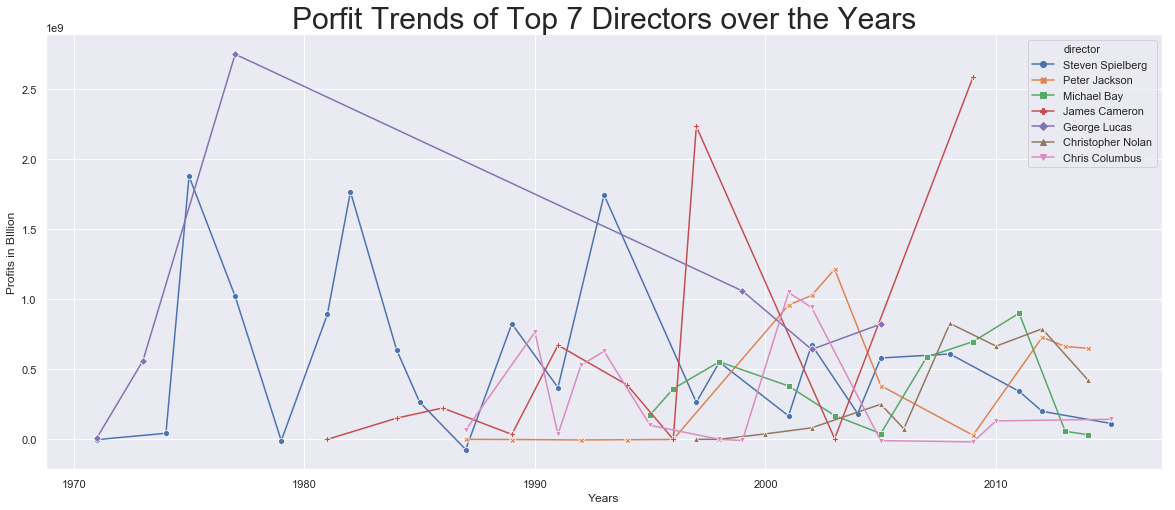

In [180]:
#line chart to show the trend of profits of the top 10 directors over the year
sns.set(style="darkgrid")
a4_dims=(20,8)
fig, ax = pyplot.subplots(figsize=a4_dims)
top_dir_gr = sns.lineplot(x="release_year",y="profit",hue="director",style="director",markers=True,dashes=False,data=director_yearly_profit)
top_dir_gr.set_title("Porfit Trends of Top 7 Directors over the Years",fontsize=30);
ax.set(ylabel='Profits in BIllion', xlabel='Years');

### 3) What are the most popular genres

In [30]:
# Grouping release year and genre by popularity
df_genres=mdf.groupby(['release_year','genres'],as_index=False).agg({"popularity":"mean"}).sort_values(by='popularity')

In [31]:
# Top genres by release year based on popularity
df_genres.nlargest(10,'popularity')

,release_year,genres,popularity
5834,2015,Action|Adventure|Science Fiction|Thriller,30.702849
5597,2014,Adventure|Drama|Science Fiction,24.949134
5577,2014,Action|Science Fiction|Adventure,14.311205
5875,2015,Adventure|Science Fiction|Thriller,13.112507
5555,2014,Action|Adventure|Science Fiction,12.971027
582,1977,Adventure|Action|Science Fiction,12.037933
5832,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
5769,2014,Science Fiction|Adventure|Thriller,10.739009
4302,2009,Action|Adventure|Fantasy|Science Fiction,9.432768
4596,2010,Action|Thriller|Science Fiction|Mystery|Adventure,9.363643


### 4) Most Profitable Movies and Genres

In [32]:
movie_list = mdf.groupby(['original_title','director','genres'],as_index=False).agg({'revenue_adj':'sum','budget_adj':'sum','vote_average':'mean','popularity':'mean'})
movie_list['profit'] = movie_list["revenue_adj"]-movie_list["budget_adj"]
top_movie_profit = movie_list.nlargest(5,'profit')
top_movie_profit

,original_title,director,genres,revenue_adj,budget_adj,vote_average,popularity,profit
7522,Star Wars,George Lucas,Adventure|Action|Science Fiction,2.789712e+09,3.957559e+07,7.9,12.037933,2.750137e+09
834,Avatar,James Cameron,Action|Adventure|Fantasy|Science Fiction,2.827124e+09,2.408869e+08,7.1,9.432768,2.586237e+09
9940,Titanic,James Cameron,Drama|Romance|Thriller,2.506406e+09,2.716921e+08,7.3,4.355219,2.234714e+09
8452,The Exorcist,William Friedkin,Drama|Horror|Thriller,2.167325e+09,3.928928e+07,7.2,2.010733,2.128036e+09
4393,Jaws,Steven Spielberg,Horror|Thriller|Adventure,1.907006e+09,2.836275e+07,7.3,2.563191,1.878643e+09


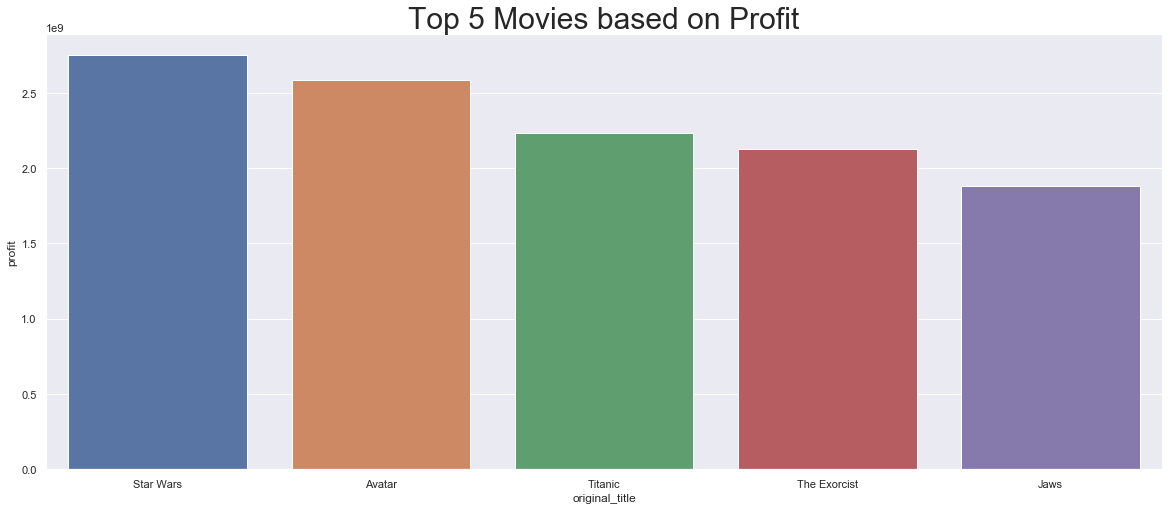

In [33]:
sns.set(style="darkgrid")
a4_dims=(20,8)
fig, ax = plt.subplots(figsize=a4_dims)
top_movie_gr = sns.barplot(x="original_title",y="profit",data=top_movie_profit)
top_movie_gr.set_title("Top 5 Movies based on Profit",fontsize=30);

### 5) Most Popular Movies

In [34]:
top_movie_vote = movie_list.nlargest(5,'popularity')
top_movie_vote

,original_title,director,genres,revenue_adj,budget_adj,vote_average,popularity,profit
4530,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,1.392446e+09,1.379999e+08,6.5,32.985763,1.254446e+09
5180,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,3.481613e+08,1.379999e+08,7.1,28.419936,2.101614e+08
4256,Interstellar,Christopher Nolan,Adventure|Drama|Science Fiction,5.726906e+08,1.519800e+08,8.0,24.949134,4.207106e+08
3563,Guardians of the Galaxy,James Gunn,Action|Science Fiction|Adventure,7.122911e+08,1.565855e+08,7.9,14.311205,5.557057e+08
4248,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2.716190e+08,1.012000e+08,6.3,13.112507,1.704191e+08


### 6) Do popular movies have more budget

In [35]:
year_movies = mdf.groupby('release_year',as_index=False).agg({'budget_adj':'sum','revenue_adj':'sum','popularity':'max'})
year_movies['profit']= year_movies['revenue_adj']-year_movies['budget_adj']

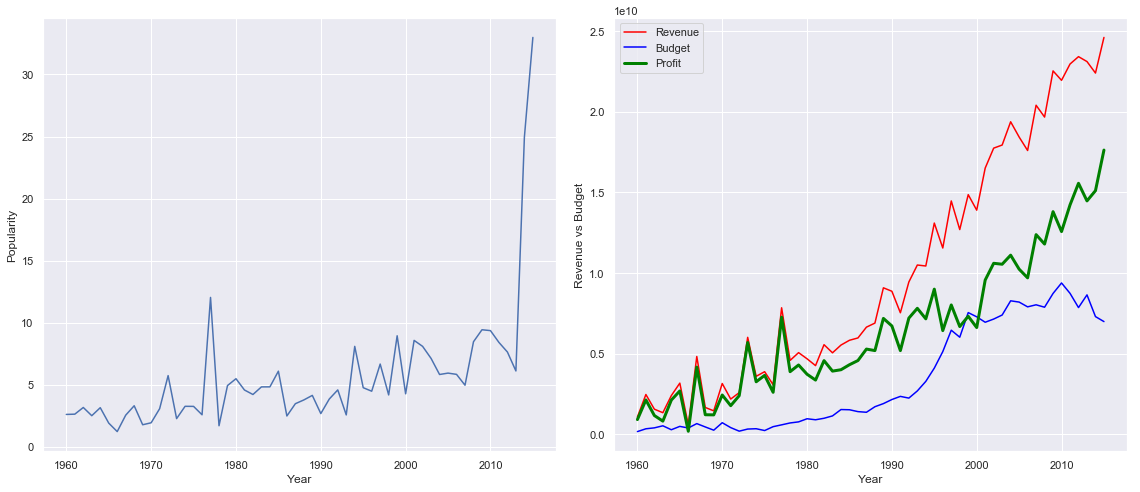

In [36]:
dims=(16,7)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=dims)
axes[0].plot(year_movies['release_year'],year_movies['popularity'])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Popularity")
axes[1].plot(year_movies['release_year'],year_movies['revenue_adj'],label='Revenue',color='red',)
axes[1].plot(year_movies['release_year'],year_movies['budget_adj'],label='Budget',color='blue')
axes[1].plot(year_movies['release_year'],year_movies['profit'],label='Profit',color='green',linewidth=3)
axes[1].legend(loc=0)
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Revenue vs Budget")

plt.tight_layout()

 > **Observation**: The popularity of the movies have increased over time and so has the budget and revenue. The trend above gives us a sense that the revenue and profit of the movies have increased with time with the increasing budget

### 7) Production Houses of the Most Profitable Movies and Directors

In [44]:
# 
top_7_dir['profit']=top_10_dir['budget_adj']-top_10_dir['revenue_adj']
top_7_dir


C:\Users\shreh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
13,5.984995,88000000,243637091,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,Chris Columbus,105,Action|Comedy|Science Fiction,Columbia Pictures|Happy Madison Productions,7/16/15,1575,5.8,2015,8.095996e+07,2.241460e+08,-1.431861e+08
33,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,3.679998e+07,1.496016e+08,-1.128016e+08
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08,-4.207106e+08
634,10.174599,250000000,955119788,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,144,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,12/10/14,3110,7.1,2014,2.302728e+08,8.797523e+08,-6.494795e+08
648,4.983782,210000000,245500000,Transformers: Age of Extinction,Mark Wahlberg|Stanley Tucci|Nicola Peltz|Jack ...,Michael Bay,165,Science Fiction|Action|Adventure,Paramount Pictures|Amblin Entertainment|Di Bon...,6/25/14,2161,5.9,2014,1.934291e+08,2.261279e+08,-3.269873e+07
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,-2.750137e+09
1334,1.104816,20000000,303788635,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,135,Science Fiction|Drama,Columbia Pictures Corporation|EMI Films|Julia ...,11/16/77,600,7.0,1977,7.195562e+07,1.092965e+09,-1.021009e+09
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,-2.586237e+09
1418,1.673879,65000000,93525586,The Lovely Bones,Rachel Weisz|Mark Wahlberg|Susan Sarandon|Saoi...,Peter Jackson,136,Fantasy|Drama,WingNut Films|DreamWorks SKG|Key Creatives|Fil...,12/26/09,600,6.6,2009,6.606603e+07,9.505945e+07,-2.899342e+07
1487,0.813323,150000000,836297228,Transformers: Revenge of the Fallen,Shia LaBeouf|Megan Fox|Josh Duhamel|Rainn Wils...,Michael Bay,150,Science Fiction|Action|Adventure,Paramount Pictures|DreamWorks SKG|Amblin Enter...,6/19/09,2230,6.0,2009,1.524601e+08,8.500129e+08,-6.975528e+08


In [45]:
top_7_dir['production_companies'].head()

13           Columbia Pictures|Happy Madison Productions
33     DreamWorks SKG|Amblin Entertainment|Studio Bab...
629    Paramount Pictures|Legendary Pictures|Warner B...
634    WingNut Films|New Line Cinema|3Foot7|Metro-Gol...
648    Paramount Pictures|Amblin Entertainment|Di Bon...
Name: production_companies, dtype: object

In [46]:
top_7_dir['prod_count']=(top_10_dir['production_companies'].str.split('|')).str.len()

C:\Users\shreh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
top_7_dir[['director','production_companies','prod_count','release_year']].sort_values(by="release_year",ascending=False)

,director,production_companies,prod_count,release_year
13,Chris Columbus,Columbia Pictures|Happy Madison Productions,2.0,2015
33,Steven Spielberg,DreamWorks SKG|Amblin Entertainment|Studio Bab...,5.0,2015
629,Christopher Nolan,Paramount Pictures|Legendary Pictures|Warner B...,5.0,2014
634,Peter Jackson,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,4.0,2014
648,Michael Bay,Paramount Pictures|Amblin Entertainment|Di Bon...,5.0,2014
5431,Peter Jackson,WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...,3.0,2013
5523,Michael Bay,Paramount Pictures|De Line Pictures,2.0,2013
4363,Christopher Nolan,Legendary Pictures|Warner Bros.|DC Entertainme...,4.0,2012
4425,Steven Spielberg,DreamWorks|Amblin Entertainment|Twentieth Cent...,5.0,2012
4367,Peter Jackson,WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...,3.0,2012


In [58]:
# Top 15 profit generating directors, associated production houses and profit generated
prod_houses = top_7_dir.groupby(['director','production_companies']).agg({'profit':'sum','prod_count':'sum'})
# Top 15 based on profit
prod_houses.nlargest(15,'profit')

profit  \
director          production_companies                                               
Steven Spielberg  Amblin Entertainment|Warner Bros.                   7.292506e+07   
Chris Columbus    Ingenious Film Partners|1492 Pictures|Fox Atomi...  1.829521e+07   
Steven Spielberg  Columbia Pictures|Universal Pictures|A-Team         9.747548e+06   
Chris Columbus    Columbia Pictures|1492 Pictures|Revolution Studios  9.300280e+06   
                  Laurence Mark Productions|1492 Pictures|Columbi...  8.247033e+06   
Peter Jackson     WingNut Films|New Zealand Film Commission|Avalo...  4.285031e+06   
                  WingNut Films|Miramax Films|New Zealand Film Co...  2.869940e+06   
Steven Spielberg  Universal TV                                        2.423338e+06   
Peter Jackson     WingNut Films                                       1.319239e+06   
                  WingNut Films|Universal Pictures                    8.908286e+05   
James Cameron     Brouwersgracht Investments|Chako Film Company       3.496226e+05   
Peter Jackson     WingNut Films|New Zealand Film Commission           4.933956e+04   
Chris Columbus    Columbia Pictures|1492 Pictures                     0.000000e+00   
Christopher Nolan Syncopy|Next Wave Films                             0.000000e+00   
James Cameron     Walt Disney Pictures|Walden Media|Earthship Pro... -4.789857e+06   

                                                                      prod_count  
director          production_companies                                            
Steven Spielberg  Amblin Entertainment|Warner Bros.                          2.0  
Chris Columbus    Ingenious Film Partners|1492 Pictures|Fox Atomi...         5.0  
Steven Spielberg  Columbia Pictures|Universal Pictures|A-Team                3.0  
Chris Columbus    Columbia Pictures|1492 Pictures|Revolution Studios         3.0  
                  Laurence Mark Productions|1492 Pictures|Columbi...         5.0  
Peter Jackson     WingNut Films|New Zealand Film Commission|Avalo...         3.0  
                  WingNut Films|Miramax Films|New Zealand Film Co...         4.0  
Steven Spielberg  Universal TV                                               1.0  
Peter Jackson     WingNut Films                                              1.0  
                  WingNut Films|Universal Pictures                           2.0  
James Cameron     Brouwersgracht Investments|Chako Film Company              2.0  
Peter Jackson     WingNut Films|New Zealand Film Commission                  2.0  
Chris Columbus    Columbia Pictures|1492 Pictures                            2.0  
Christopher Nolan Syncopy|Next Wave Films                                    2.0  
James Cameron     Walt Disney Pictures|Walden Media|Earthship Pro...         3.0

>**Observation:** Based on above analysis we can conclude - 
>> - Movies with the most revenue have a lot of budget.
>> - Almost all of These movies are also more popular given to the high budget which helps with higher expenses on promotion increasing their popularity
>> - These high revenue generating movies are mostly directed by top directors which are backed by multiple big production companies
>> - So we can say that movies directed by top directors have more budget because of the big production companies which in turn helps with more expensive promotions resulting in higher popularity. Therefore, more revenue and profit